In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [19]:
df=pd.read_csv("logs.csv")

/var/folders/70/q89cls2j7835xgqtfjz6hw240000gn/T/ipykernel_13192/2533296147.py:1: DtypeWarning: Columns (34,38,39,40,47,50,53,54,57,58,59,60,62,68,70,72,73,74,76,77,78,81,85,88,89,90,91,92,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,118,120,121,122,123,129,131) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("logs.csv")


In [20]:
df.head()

,row_id,player_id,school,wave,session,date,event_id,event_description,event_category,event_time,...,piece2_id,piece3_id,opponent_point_loss,player_points,opponent_points,old_rating,new_rating,priority_type_that_went_to_zero,epilogue_item_id,item_locked_unlocked_state
0,1,6427001,3561,"3561 (T,TH) Spring 2013",Session 1,2013-03-07,600,Player selects age,Avatar Creation,3M 18S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,6427001,3561,"3561 (T,TH) Spring 2013",Session 1,2013-03-07,601,Player selects gender,Avatar Creation,3M 19S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,6427001,3561,"3561 (T,TH) Spring 2013",Session 1,2013-03-07,602,Player commits to age and gender,Avatar Creation,3M 25S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,6427001,3561,"3561 (T,TH) Spring 2013",Session 1,2013-03-07,603,Player selects avatar,Avatar Creation,3M 30S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,6427001,3561,"3561 (T,TH) Spring 2013",Session 1,2013-03-07,604,Player commits to avatar and name,Avatar Creation,4M 12S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
cols=['skill_level_know','skill_level_priority',"skill_level_refusal","skill_level_me","skill_level_people","event_time_dbl","event_id","player_id","avatar_age"]
df=df[cols]

In [22]:
df=df.fillna(method="ffill")

In [23]:
df2= df[df["event_id"]==200]

In [26]:
df2

,skill_level_know,skill_level_priority,skill_level_refusal,skill_level_me,skill_level_people,event_time_dbl,event_id,player_id,avatar_age
178,0.0,0.0,0.0,6.0,0.0,881,200,6427001,13.0
1429,1.0,3.0,0.0,6.0,2.0,3796,200,6427001,13.0
1860,3.0,3.0,0.0,6.0,3.0,4730,200,6427001,13.0
2428,3.0,3.0,2.0,9.0,5.0,6367,200,6427001,13.0
3199,5.0,6.0,7.0,12.0,6.0,8245,200,6427001,13.0
...,...,...,...,...,...,...,...,...,...
2103292,6.0,9.0,3.0,9.0,6.0,1618,200,65670032,12.0
2103587,6.0,9.0,9.0,12.0,6.0,2252,200,65670032,12.0
2103851,6.0,9.0,12.0,18.0,6.0,2687,200,65670032,12.0
2104830,6.0,9.0,12.0,18.0,17.0,3513,200,65670032,12.0


In [24]:
group_player=df.groupby("player_id").max()

In [43]:
group_player

,skill_level_know,skill_level_priority,skill_level_refusal,skill_level_me,skill_level_people,event_time_dbl,event_id,avatar_age
player_id,,,,,,,,
6427001,30.0,30.0,26.0,30.0,29.0,37718,1005,13.0
6427002,30.0,30.0,26.0,30.0,29.0,3735,1005,13.0
6427004,29.0,29.0,28.0,30.0,29.0,30307,1005,13.0
6427005,29.0,29.0,28.0,30.0,29.0,3729,1005,13.0
6427006,29.0,30.0,30.0,30.0,27.0,31927,1005,13.0
...,...,...,...,...,...,...,...,...
6626006,28.0,30.0,27.0,30.0,26.0,40352,1005,13.0
6626007,15.0,13.0,18.0,27.0,15.0,467294,1005,11.0
7540835,15.0,13.0,18.0,27.0,15.0,535,708,14.0


In [34]:
group_age=group_player.groupby("avatar_age").mean()

In [39]:
group_age=group_age.reset_index()

In [40]:
group_age

,avatar_age,skill_level_know,skill_level_priority,skill_level_refusal,skill_level_me,skill_level_people,event_time_dbl,event_id
0,11.0,19.709677,21.838710,21.741935,26.096774,19.967742,172291.419355,1005.000000
1,12.0,24.772727,27.590909,26.454545,28.590909,24.954545,246414.863636,1005.000000
2,13.0,24.613636,26.886364,25.227273,28.159091,24.750000,195987.363636,1005.000000
3,14.0,23.723404,25.914894,25.553191,28.191489,24.361702,182608.808511,998.680851


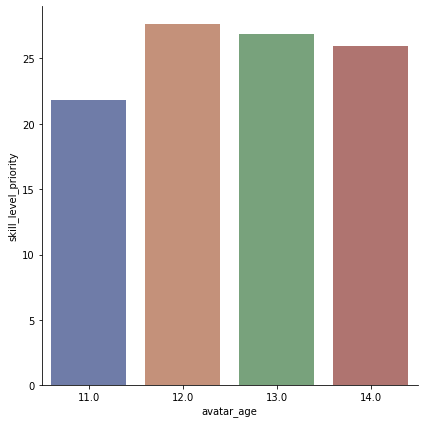

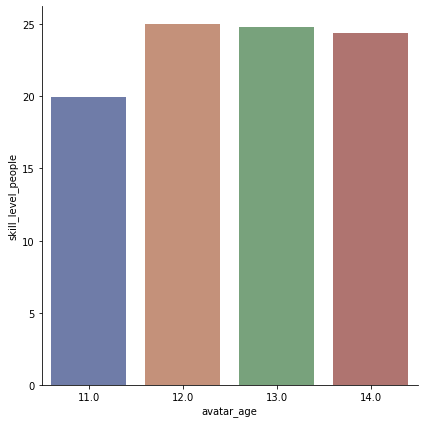

In [42]:
g = sns.catplot(
    data=group_age, kind="bar",
    x="avatar_age", y="skill_level_priority",
    ci="sd", palette="dark", alpha=.6, height=6
)
g = sns.catplot(
    data=group_age, kind="bar",
    x="avatar_age", y="skill_level_people",
    ci="sd", palette="dark", alpha=.6, height=6
)